In [1]:
print("Hello World!")

Hello World!


In [1]:
# Importing the Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [4]:
# Creating a Virtual Dataset that is nothing but a line equatoin y = 2x + 3
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

# Creating a function to compute the Gradient and Iterating it using a learning rate to fit the data

In [2]:

%matplotlib inline
def gradient_descent(x,y, rate=0.01, iterations=10):
    m0 = 0
    b0 = y.sum()/y.size
    rate = rate
    n = len(x)
    changes=[(m0,b0)]
    
    #fig, ax1 = plt.subplots()
    #ax1.scatter(x,y,color='red',marker='+',linewidth='5')
    #ax2 = ax1.twinx()
    for i in range(iterations):
        y_predicted = m0 * x + b0
#         print (m_curr,b_curr, i)
        #ax2.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m0 - rate * md
        b_curr = b0 - rate * yd
        m0 = m_curr
        b0 = b_curr

        changes.append((m0,b0))

    return b0, m0, changes, rate

In [6]:
# Calling the function with user defined learning rate and iteration number to check the output
gradient_descent(x,y,0.01,100)

(7.33829805739597,
 0.7983610029337421,
 [(0, 9.0),
  (0.08, 9.0),
  (0.1424, 8.9952),
  (0.19135999999999997, 8.986752000000001),
  (0.23005567999999993, 8.97553536),
  (0.2609113087999999, 8.962221312),
  (0.28577754214399986, 8.947322207232),
  (0.3060671504383999, 8.93122911055872),
  (0.3228586307084287, 8.914240499321242),
  (0.3369753019932999, 8.89658417149231),
  (0.3490456852652353, 8.878433969942867),
  (0.35954959631031147, 8.859922549428095),
  (0.36885333215635724, 8.841151122660914),
  (0.3772365317223038, 8.822196900278314),
  (0.38491268072669815, 8.803118770369409),
  (0.39204476474466005, 8.783961634118418),
  (0.39875721845372974, 8.76475971555137),
  (0.40514504746082697, 8.74553908813312),
  (0.4112807917314579, 8.726319603522807),
  (0.4172198413391687, 8.707116363948463),
  (0.42300449440764376, 8.687940846189145),
  (0.42866705486661344, 8.668801759600903),
  (0.4342321972199043, 8.649705701116888),
  (0.43971877176451213, 8.630657655261356),
  (0.4451411826606

# Using Matplotlib anaimation to visualize Gradient Descent Working

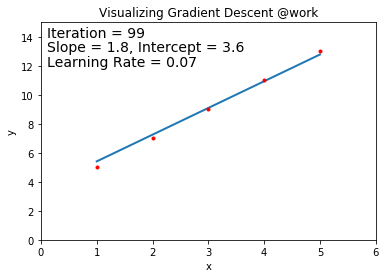

In [8]:
fig, ax = plt.subplots()
#ax1.scatter(x,y,color='red',marker='+',linewidth='5')
#ax2 = ax1.twinx()

ax.set_xlim(( 0, 6))
ax.set_ylim((0, 15))
ax.title.set_text('Visualizing Gradient Descent @work')
ax.set_ylabel('y')
ax.set_xlabel('x')
#ax.text(0.1, 14.0, 'Iteration')

line, = ax.plot([], [], lw=2)
iteration_text = ax.text(0.1, 14.0, '', fontsize=14)
slope_bi_text = ax.text(0.1, 13.0, '', fontsize=14)
lr_text = ax.text(0.1,12.0, '', fontsize=14)

w1, b1, changes, rate  = gradient_descent(x,y,0.07,100)

#y1 = changes[0][0] + x * changes[0][1]
plt.plot(x,y,'r.');

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    w1, b1 = changes[i]
    y1 = x * w1 + b1
    line.set_data(x, y1)
    iteration_text.set_text('Iteration = {0}'.format(i))
    slope_bi_text.set_text('Slope = {:0.1f}, Intercept = {:0.1f}'.format(w1, b1))
    lr_text.set_text('Learning Rate = {0}'.format(rate))
    return line, iteration_text

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=200, 
                               blit=True)

HTML(anim.to_jshtml())

In [40]:
# Writing it to Disk
anim.save('grad_desc.gif', writer='PillowWriter', fps=2)

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


# Again, using Matplotlib Animation, but this time to visualize Optimal Vs Exploding Vs Vanishing Graident scenarios

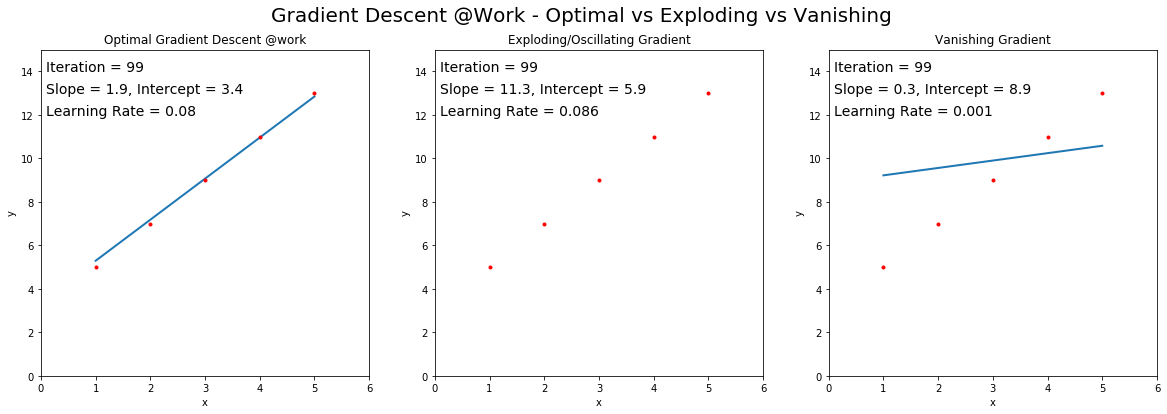

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, constrained_layout=False, figsize=(20,6))
fig.suptitle('Gradient Descent @Work - Optimal vs Exploding vs Vanishing',fontsize=20)
#ax1.scatter(x,y,color='red',marker='+',linewidth='5')
#ax2 = ax1.twinx()

ax1.set_xlim(( 0, 6))
ax1.set_ylim((0, 15))
ax1.title.set_text('Optimal Gradient Descent @work')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
#ax.text(0.1, 14.0, 'Iteration')

line1, = ax1.plot([], [], lw=2)
iteration_text1 = ax1.text(0.1, 14.0, '', fontsize=14)
slope_bi_text1 = ax1.text(0.1, 13.0, '', fontsize=14)
lr_text1 = ax1.text(0.1,12.0, '', fontsize=14)

ax2.set_xlim(( 0, 6))
ax2.set_ylim((0, 15))
ax2.title.set_text('Exploding/Oscillating Gradient')
ax2.set_ylabel('y')
ax2.set_xlabel('x')

line2, = ax2.plot([], [], lw=2)
iteration_text2 = ax2.text(0.1, 14.0, '', fontsize=14)
slope_bi_text2 = ax2.text(0.1, 13.0, '', fontsize=14)
lr_text2 = ax2.text(0.1,12.0, '', fontsize=14)

ax3.set_xlim(( 0, 6))
ax3.set_ylim((0, 15))
ax3.title.set_text('Vanishing Gradient')
ax3.set_ylabel('y')
ax3.set_xlabel('x')

line3, = ax3.plot([], [], lw=2)
iteration_text3 = ax3.text(0.1, 14.0, '', fontsize=14)
slope_bi_text3 = ax3.text(0.1, 13.0, '', fontsize=14)
lr_text3 = ax3.text(0.1,12.0, '', fontsize=14)

w11, b11, changes1, rate1  = gradient_descent(x,y,0.08,100)
w12, b12, changes2, rate2  = gradient_descent(x,y,0.086,100)
w13, b13, changes3, rate3  = gradient_descent(x,y,0.001,100)

#y1 = changes[0][0] + x * changes[0][1]
ax1.plot(x,y,'r.');
ax2.plot(x,y,'r.');
ax3.plot(x,y,'r.');

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3

def animate(i):
    w11, b11 = changes1[i]
    y11 = x * w11 + b11
    line1.set_data(x, y11)
    iteration_text1.set_text('Iteration = {0}'.format(i))
    slope_bi_text1.set_text('Slope = {:0.1f}, Intercept = {:0.1f}'.format(w11, b11))
    lr_text1.set_text('Learning Rate = {0}'.format(rate1))

    w12, b12 = changes2[i]
    y12 = x * w12 + b12
    line2.set_data(x, y12)
    iteration_text2.set_text('Iteration = {0}'.format(i))
    slope_bi_text2.set_text('Slope = {:0.1f}, Intercept = {:0.1f}'.format(w12, b12))
    lr_text2.set_text('Learning Rate = {0}'.format(rate2))

    w13, b13 = changes3[i]
    y13 = x * w13 + b13
    line3.set_data(x, y13)
    iteration_text3.set_text('Iteration = {0}'.format(i))
    slope_bi_text3.set_text('Slope = {:0.1f}, Intercept = {:0.1f}'.format(w13, b13))
    lr_text3.set_text('Learning Rate = {0}'.format(rate3))

    return line1, iteration_text1

anim2 = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=200, 
                               blit=True)

HTML(anim2.to_jshtml())

In [19]:
# Writing the gif file to disk
anim2.save('grad_desc_amimation.gif', writer='PillowWriter', fps=3)

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


# Refrences:
Codebasics Github_Repo:
https://github.com/codebasics/py/blob/master/ML/3_gradient_descent/gradient_descent.ipynb

Codebasics Youtube Channel:
https://www.youtube.com/watch?v=vsWrXfO3wWw&t=1479s

Mark Jay Youtube Channel:
https://www.youtube.com/watch?v=c7GoaIsPlLE

Mark Jay Github_Repo:
https://github.com/markjay4k/fourier-transform/blob/master/Animated%20Sinc%20and%20FT%20example.ipynb
